In [1]:
import beatmap as bt
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, widgets

# BET
This notebook aims to provide a better understanding of Brunauer–Emmett–Teller (BET) theory, and, hopefully, a more accurate specific surface area answer.

Analysis of adsorption isotherms by BET theory is easily done, but can provide misleading answers. A paper by Roquerol et al describes five criteria that can be used to determine which relative pressure ranges of an isotherm follow the assumptions of BET Theory [1](#references).

As an example, this notebook uses data for a cyclohexane adsorption isotherm on carbon black:

|P/Po |n [mol/g]|
|-|-|
|0.010|0.00055797|
|0.020|0.00068050|
|0.030|0.00076186|
|0.040|0.00082042|
|0.050|0.00086352|
|0.060|0.00089899|
|0.070|0.00093262|
|0.080|0.00095784|
|0.090|0.00098287|
|0.100|0.00100306|
|0.125|0.00105080|
|0.150|0.00108762|
|0.175|0.00111806|
|0.200|0.00114453|
|0.225|0.00116956|
|0.250|0.00119198|
|0.275|0.00121517|
|0.300|0.00123701|
|0.350|0.00127731|
|0.400|0.00132157|
|0.450|0.00136776|
|0.500|0.00141743|
|0.550|0.00147319|
|0.600|0.00153784|
|0.700|0.00170820|
|0.800|0.00198351|
|0.900|0.00256767|

In [2]:
#cyclohexane adsorption on vulcan xc-72
relp = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9] 
n = [0, 0.00055797, 0.0006805, 0.00076186, 0.00082042, 0.00086352, 0.00089899, 0.00093262, 0.00095784, 0.00098287, 0.00100306, 0.0010508, 0.00108762, 0.00111806, 0.00114453, 0.00116956, 0.00119198, 0.00121517, 0.00123701, 0.00127731, 0.00132157, 0.00136776, 0.00141743, 0.00147319, 0.00153784, 0.0017082, 0.00198351, 0.00256767]

The `import_list_data` function allows the user to import data from list objects.

Data can also imported from .csv files with two columns of data, relative pressure in column one and amount adsorbed (n, g/mol) in column two, using the `import_data` function.

Regardless of import method the user provides the adsorbate information, adsorbed cross sectional area has units of square Angstrom. 

Common values are:

| Adsorbate | Cross Sectional Area |
| --- | --- |
| Ar | 15 |
| N2 | 16.2 |
| Kr | 20 |
| Water | 10.5 |
| Ethanol | 35.3 |
| Cyclohexane | 39 |


Data import functions return a named tuple, `isotherm_data`, containing a dataframe of the experimental data, the adsorbate cross sectional area, information on the system, and the file name/path.

The `bet()` function applies BET theory to every relative pressure range in the isotherm data. It returns arrays of specific surface area values, monolayer amounts, BET constants, error between experimental and theoretical isotherms, and linear regression results, all stored in a named tuple `bet_results`

In [3]:
isotherm_data = bt.io.import_list_data(relp, n)
bet_results = bt.core.bet(isotherm_data.iso_df, isotherm_data.a_o,
                          isotherm_data.info)

Enter name for dataset:test
Enter name of adsorbate used:chex
Enter cross sectional area of adsorbate in square Angstrom:39

Adsorbate used has an adsorbed cross sectional area of 39.00 sq. Angstrom.

Isotherm data quality appears good.
Adsorbed molar amounts are increasing as relative pressure increases.
Isotherm is type II.


The `experimental_data_plot()` function creates an xy scatter plot of the isotherm data. Setting the file_name parameter to 'do not save' prevents .png files of graphics from being saved. 

Experimental data plot saved as: experimentaldata_chex.png


()

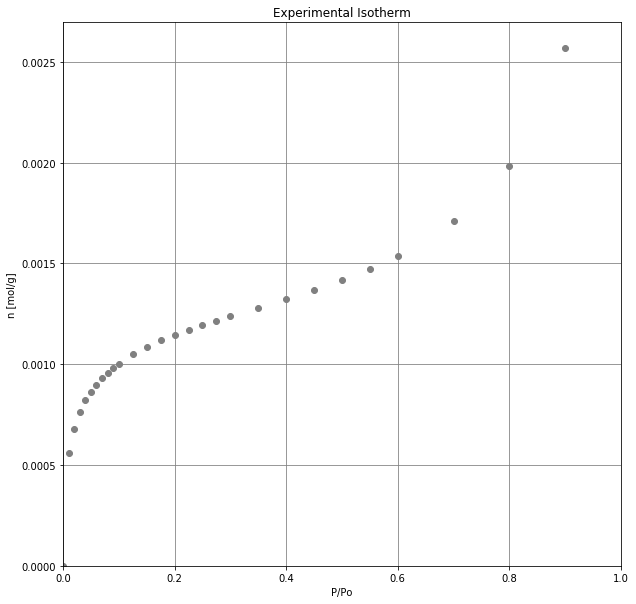

In [4]:
bt.vis.experimental_data_plot(isotherm_data, save_file=True)

## The Five Checks

The five checks for BET validity can be grouped into three categories. The first two checks are validity checks, the second two checks are consistency checks, and the fifth check is just a minimum number of data points, set by the user, to be considered a valid relative pressure range.

Check 1: n(Po-P) must increase as relative pressure inceases.

Check 2: positive y-intercept of BET equation (ie positive 'C', the BET constant).

Check 3: the monolayer adsorbed amount, nm, must fall within the range of adsorbed amounts of the relative pressure interval.

Check 4: n is set to nm in the BET equation, and the equation is solved for relative pressure. This pressure is then check with the relative pressure corresopnding to monolayer completion and must agree within 10%.

Check 5: the minimum number of data points required for a relative pressure range to be considered valid.

`rouq_mask()` allows the user to select which checks are applied to the BET data, and the minimum number of data points per valid relative pressure interval. By default all checks are applied and the minimum number of data points is five. A named tuple, `mask_results` containing a mask and arrays for each individual check, is returned.

In [5]:
mask_results = bt.core.rouq_mask(bet_results.intercept, bet_results.iso_df, bet_results.nm, bet_results.slope,
                                 check1=True, check2=True, check3=True, check4=True, check5=True, points=5)

`ssa_ans()` provides a single specific surface answer, the valid specific surface area value with the lowest error, or from the relative pressure range with the most points.

In [6]:
ssa_ans = bt.core.ssa_answer(bet_results, mask_results, criterion='points')

The specific surface area value, based on points is 228.96 m2/g.


The specific surface area value that results from BET analysis can be visulaized as a heatmap, where every cell represents a relative pressure range. The gradient of each cell corresponds to the specific surface area of that relative pressure range.

`ssa_heatmap` creates a heatmap of specific surface area values, `err_heatmap` does the same for error values. The heatmap's color mapping can be changed by passing a valid Seaborn color gradient name to the `gradient` parameter.

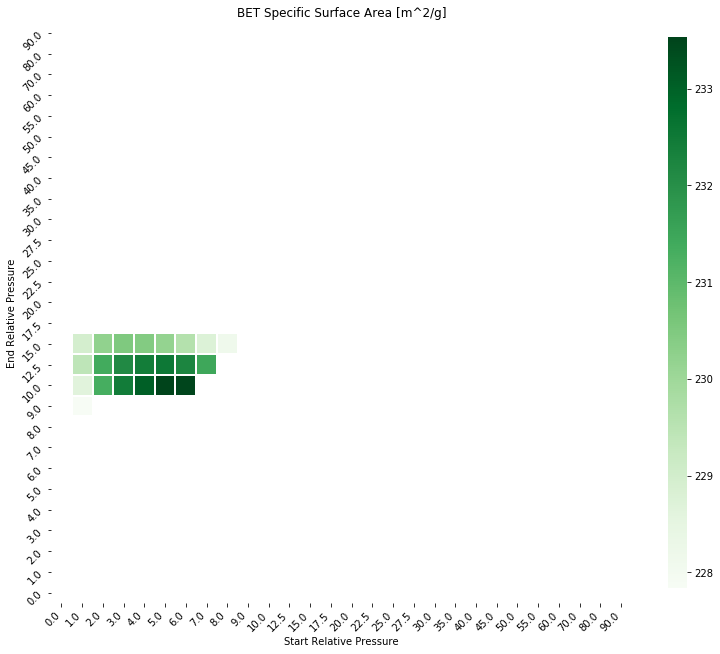

In [7]:
bt.vis.ssa_heatmap(bet_results, mask_results, save_file=False, gradient='Greens')

Error between the experimental data points and theoretical isotherm can also be visualized with a heatmap. 

A lower error indicates better agreement between experimental data and the BET equation over the realtive pressure range.

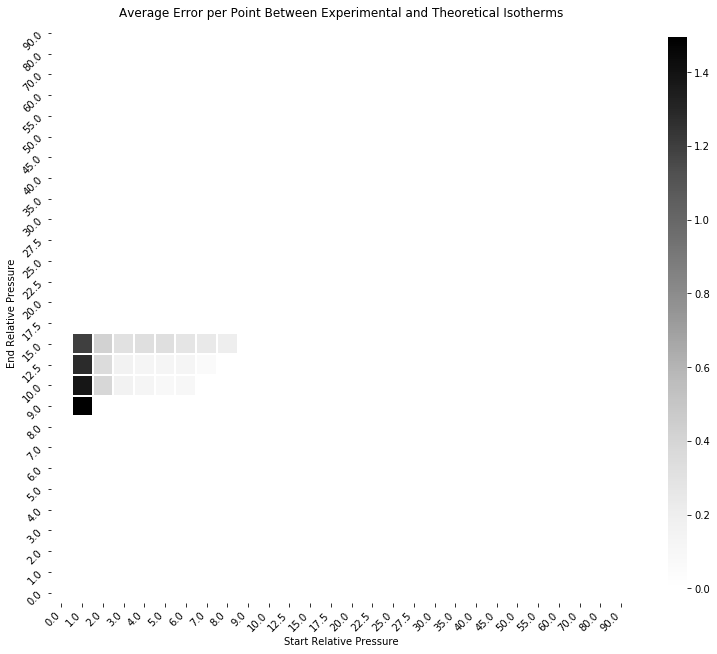

In [8]:
bt.vis.err_heatmap(bet_results, mask_results, save_file=False, gradient='Greys')

The `bet_combo_plot()` function creates BET Plots of the relative pressure ranges with the highest and lowest error for comparison.

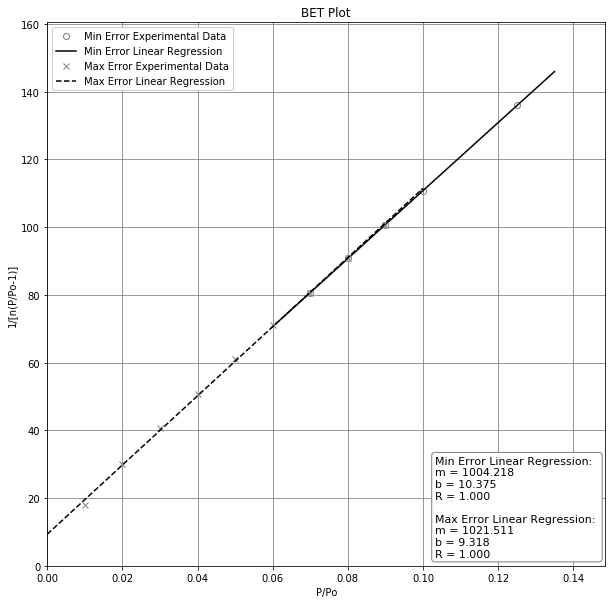

In [9]:
bt.vis.bet_combo_plot(bet_results, mask_results, save_file=False)

The `iso_combo_plot()` function plots experimental data points and the theoretical isotherm for the lowest error relative pressure range on the same figure. Data points used in the BET analysis are emphasized with filled circles.

One can quickly get an idea of where in the relative pressure range the monolayer amount, nm, has been adsorbed by looking for where n/nm = 1.

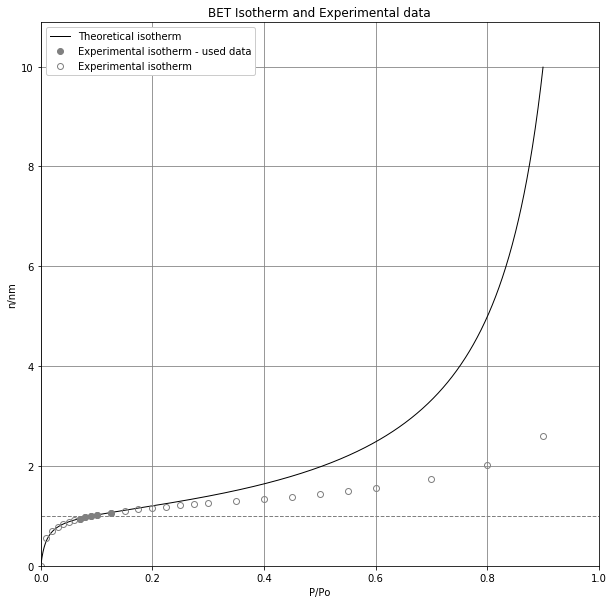

In [10]:
bt.vis.iso_combo_plot(bet_results, mask_results, save_file=False)

`ascii_tables` may be used to create summary tables of the BET results. One table highlights the minimum and maximum specific surface area values and their relative pressure ranges. The other focuses on minimum and maximum values of the BET constant and the error between experimental data and theoretical isotherms.

In [11]:
bt.vis.ascii_tables(bet_results, mask_results)



+----------------+--------------+---------+------------+----------+
|                | Spec SA m2/g |    C    | Start P/Po | End P/Po |
+----------------+--------------+---------+------------+----------+
|  Min Spec SA   |   227.834    | 110.627 |    0.01    |   0.09   |
|  Max Spec SA   |   233.533    |  89.609 |    0.05    |   0.1    |
|  Mean Spec SA  |   230.857    |   n/a   |    n/a     |   n/a    |
| Median Spec SA |   230.918    |   n/a   |    n/a     |   n/a    |
+----------------+--------------+---------+------------+----------+
Standard deviation of specific surface area = 1.722


+-------------+-----------------+---------+------------+----------+-------+
|             | C, BET Constant | Spec SA | Start P/Po | End P/Po | Error |
+-------------+-----------------+---------+------------+----------+-------+
|    Min C    |      89.609     | 233.533 |    0.05    |   0.1    | 0.087 |
|    Max C    |     116.434     |  228.16 |    0.08    |   0.15   | 0.209 |
|    Mean C   |     

The summary tables are also available as dataframes, if that format is prefered.

In [12]:
ssa_table, c_table, ssa_std, c_std = bt.vis.dataframe_tables(bet_results, mask_results)
print(ssa_table)
print('Standard deviation of the specific surface area = %.3f' % (ssa_std))
print(c_table)
print('Standard deviation of BET constant (C) = %.3f' % (c_std))

                   Spec SA m2/g        C Start P/Po End P/Po
0     Min Spec SA       227.834  110.627       0.01     0.09
1     Max Spec SA       233.533   89.609       0.05      0.1
2    Mean Spec SA       230.857      n/a        n/a      n/a
3  Median Spec SA       230.918      n/a        n/a      n/a
Standard deviation of the specific surface area = 1.722
                      C  Spec SA Start P/Po End P/Po  Error
0        Min C   89.609  233.533       0.05      0.1  0.087
1        Max C  116.434   228.16       0.08     0.15  0.209
2       Mean C   99.919      n/a        n/a      n/a    n/a
3     Median C   98.518      n/a        n/a      n/a    n/a
4  Min Error C   97.788   231.48       0.07    0.125  0.062
5  Max Error C  110.627  227.834       0.01     0.09  1.495
Standard deviation of BET constant (C) = 7.481


Raw and processed data can be exported as .csv files by using `export_raw_data(isotherm_data)` and `bt.io.export_processed_data(bet_results, points=5)`.

The function are shown with parameters listed, rather than in a code cell, to avoid creating unwanted files.

<a id='references'></a>
## References
1. Rouquerol, J., P. Llewellyn, and F. Rouquerol. "Is the BET equation applicable to microporous adsorbents." Stud. Surf. Sci. Catal 160.07 (2007): 49-56.